# Task 1

In [2]:
import pandas as pd
import datetime as dt
import typing
import matplotlib.pyplot as plt

In [72]:
purchase_behaviour = pd.read_csv("resources/QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel("resources/QVI_transaction_data.xlsx") # An excel file with 1 sheet named 'in'

In [73]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## Purchase Behaviour Cleaning

It seems as though LYLTY_CARD_NBR is a four digit ID while LIFESTAGE and PREMIUM_CUSTOMER are categorical variables. Lets first do some null checks.  

In [74]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [75]:
purchase_behaviour.describe(include=["O"])

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


In [76]:
for col in purchase_behaviour.columns:
    if purchase_behaviour[col].hasnans:
        print(col)

In [77]:
purchase_behaviour['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [78]:
purchase_behaviour['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [79]:
purchase_behaviour.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


## Transaction Data Cleaning

In [80]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [81]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [82]:
transaction_data.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [83]:
for col in transaction_data.columns:
    if transaction_data[col].hasnans:
        print(col)

In [84]:
print(len(transaction_data['PROD_NAME'].unique()))
print(len(transaction_data['PROD_NBR'].unique()))

114
114


Observations:
- DATE is not in correct format. It seems to be an integer representing some amount of time passed from a start point.
- PROD_NAME seems to be in the form Company/Type&Flavour/Packet Size. Which means the data is not as flexible/robust as it potentially could be.
- Each PROD_NBR should correctly associated with the PROD_NAME
- Outliers could exist in the several numerical quantities provided
- No null values 

In [85]:
td_clean = transaction_data

In [86]:
def integer_date_to_datetime(d):
    """
    https://stackoverflow.com/questions/75203103/excel-number-to-convert-to-date
    Excel and csv integer dates are days from 1899/12/30. 
    """
    return dt.datetime(1899,12,30) + dt.timedelta(days=d)

td_clean['DATE'] = td_clean['DATE'].apply(integer_date_to_datetime)
td_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [87]:
def get_pack_size_from_prod_name(prod_name):
    # Example:
    # Natural Chip Compny SeaSalt175g 
    # Not guaranteed last word, take integer. Scan later
    return int("".join(filter(str.isdigit, prod_name)))

def get_string_until_integer(s):
    output = ""
    for c in s:
        if str.isdigit(c):
            break
        output += c
    return output

def get_brand_from_prod_name(prod_name: str):
    return get_string_until_integer(prod_name).split(" ")[0]

def get_prod_type_from_prod_name(prod_name: str):
    split = get_string_until_integer(prod_name).strip().split(" ")
    return " ".join(split[1:])

td_clean['PACK_SIZE'] = td_clean['PROD_NAME'].apply(get_pack_size_from_prod_name)
td_clean['BRAND'] = td_clean['PROD_NAME'].apply(get_brand_from_prod_name)
td_clean['TYPE'] = td_clean['PROD_NAME'].apply(get_prod_type_from_prod_name)


td_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,TYPE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,Tortilla ChpsHny&Jlpno Chili


In [88]:
print(td_clean['PACK_SIZE'].describe())
print(td_clean['BRAND'].describe())
print(td_clean['TYPE'].describe())

count    264836.000000
mean        182.427004
std          64.327196
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64
count     264836
unique        29
top       Kettle
freq       41288
Name: BRAND, dtype: object
count     264836
unique       112
top       Cheese
freq        6264
Name: TYPE, dtype: object


In [89]:
print(td_clean['PACK_SIZE'].unique())
for pack_size in td_clean['PACK_SIZE'].unique():
    print(len(td_clean[td_clean['PACK_SIZE'] == pack_size]))

[175 170 150 300 330 210 270 220 125 110 134 380 180 165 135 250 200 160
 190  90  70]
66390
19983
43131
15166
12540
6272
6285
1564
1454
22387
25102
6418
1468
15297
3257
3169
4473
2970
2995
3008
1507


In [90]:
print(td_clean['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'Woolworths' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Snbts' 'Sunbites']


In [91]:
possible_same_brands = [('Smiths', 'Smith'), ('Doritos', 'Dorito'), ('Woolworths', 'WW'), ('NCC', 'Natural'), ('Infuzions', 'Infzns'), ('RRD', 'Red'), ('Sunbites', 'Snbts')]

for psb in possible_same_brands:
    b1, b2 = psb
    print(f"================{b1} = {b2}================")
    print(td_clean[td_clean['BRAND'] == b1]['PROD_NAME'].head())
    print(td_clean[td_clean['BRAND'] == b2]['PROD_NAME'].head())

================Smiths = Smith================
2       Smiths Crinkle Cut  Chips Chicken 170g
3       Smiths Chip Thinly  S/Cream&Onion 175g
6     Smiths Crinkle Chips Salt & Vinegar 330g
10    Smiths Crinkle Chips Salt & Vinegar 330g
20           Smiths Crinkle      Original 330g
Name: PROD_NAME, dtype: object
50     Smith Crinkle Cut   Mac N Cheese 150g
115    Smith Crinkle Cut   Mac N Cheese 150g
148    Smith Crinkle Cut   Mac N Cheese 150g
167    Smith Crinkle Cut   Mac N Cheese 150g
176    Smith Crinkle Cut   Mac N Cheese 150g
Name: PROD_NAME, dtype: object
================Doritos = Dorito================
8     Doritos Corn Chip Mexican Jalapeno 150g
18    Doritos Corn Chip Southern Chicken 150g
37                   Doritos Mexicana    170g
57    Doritos Corn Chip Mexican Jalapeno 150g
63            Doritos Salsa       Medium 300g
Name: PROD_NAME, dtype: object
41     Dorito Corn Chp     Supreme 380g
67     Dorito Corn Chp     Supreme 380g
157    Dorito Corn Chp     Supreme 380g
1

It seems pretty safe to group these brands together.

In [92]:
for psb in possible_same_brands:
    preferred_brand_name, other_brand_name = psb
    td_clean.loc[td_clean['BRAND'] == other_brand_name, 'BRAND'] = preferred_brand_name

We also found Salsa products when our focus is on chips. Remove those. 

In [93]:
len(td_clean[td_clean['TYPE'].str.contains('salsa', case=False, regex=True)])

18094

There are 18094 items that contain the word salsa in their type. 

In [94]:
td_clean = td_clean.drop(td_clean[td_clean['TYPE'].str.contains('salsa', case=False, regex=True)].index)

In [95]:
print(td_clean['TYPE'].unique())

['Chip        Compny SeaSalt' 'Nacho Cheese' 'Crinkle Cut  Chips Chicken'
 'Chip Thinly  S/Cream&Onion' 'Tortilla ChpsHny&Jlpno Chili'
 'Crinkle Chips Salt & Vinegar' 'Waves         Sweet Chilli'
 'Corn Chip Mexican Jalapeno' 'Waves Sour    Cream&Chives'
 'Sensations   Siracha Lime' 'Cheese' 'Crinkle Cut      Chicken'
 'Chips Light&  Tangy' 'Original' 'Rings' 'Sour Cream &    Garden Chives'
 'Corn Chip Southern Chicken' 'Cheese Box' 'Crinkle      Original'
 'Crn Crnchers Tangy Gcamole' 'Sea Salt     And Vinegar'
 'Chip Thinly  Cut Original' 'Rock Deli Thai  Chilli&Lime'
 'Sthrn FriedChicken' 'Sweet&Spcy BBQ' 'Chips         Originl saltd'
 'Rock Deli Sp    Salt & Truffle' 'Thinly       Swt Chli&S/Cream' 'Chilli'
 'Mexicana' 'Crinkle Cut  French OnionDip' 'ChipCo      Hony Soy Chckn'
 'Corn Chp     Supreme' 'Chicken' 'Thinly Cut   Roast Chicken'
 'Mozzarella   Basil & Pesto' 'Thai SweetChili PotatoMix'
 'Sensations   Camembert & Fig' 'Crinkle Cut   Mac N Cheese'
 'Honey Soy    Chicken' '

We seem to be left with just chips now, or some variation of them. 
There are Prawn Crackers, and types that are likely very eccentric, like Mac N Cheese, Bolognese, Pork Belly.
There are also many spelling errors, however we won't worry about that for now. 

In [96]:
print(td_clean['PACK_SIZE'].describe())
print(td_clean['BRAND'].describe())
print(td_clean['TYPE'].describe())

count    246742.000000
mean        175.585178
std          59.434727
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64
count     246742
unique        21
top       Kettle
freq       41288
Name: BRAND, dtype: object
count     246742
unique       103
top       Cheese
freq        6264
Name: TYPE, dtype: object


We'll now check for outliers in the following variables:
- PROD_QTY
- TOT_SALES

Outlier identification method depends on how we expect these variables to be distributed respectively.
Lets treat them as potentially skewed distributions. 

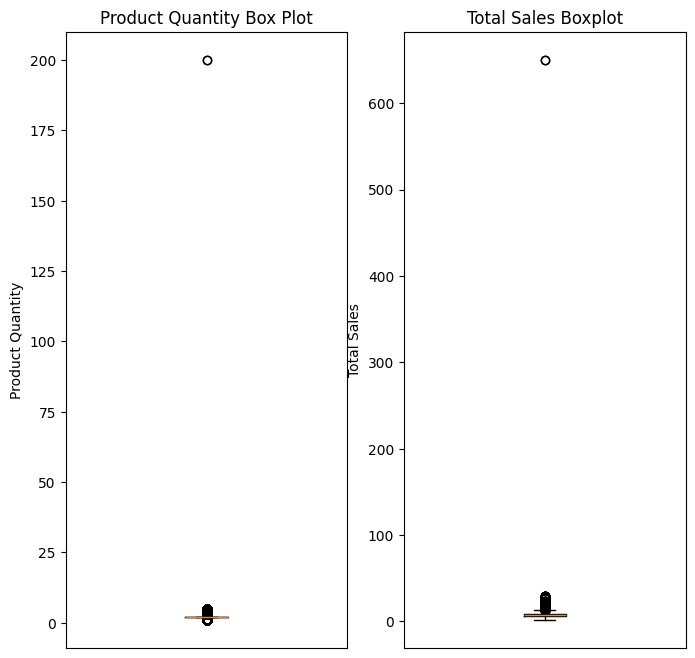

In [97]:
fig, axis = plt.subplots(1, 2)

# Needs to be bigger or the x labels are covered by titles.
fig.set_size_inches(8, 8)

ax1 = axis[0]
ax2 = axis[1]

ax1.boxplot(td_clean['PROD_QTY'])
ax1.set_title("Product Quantity Box Plot")
ax1.set_ylabel("Product Quantity")
ax1.axes.get_xaxis().set_visible(False)

ax2.boxplot(td_clean['TOT_SALES'])
ax2.set_title("Total Sales Boxplot")
ax2.set_ylabel("Total Sales")
ax2.axes.get_xaxis().set_visible(False)

In [98]:
def calc_outlier_bounds_normal(column_name):
    column = td_clean[column_name]
    mean = column.mean()
    sd = column.std()
    lb = mean - 3 * sd
    ub = mean + 3 * sd
    print(f"Lowerbound: {lb}, Upperbound: {ub}")

In [99]:
calc_outlier_bounds_normal('PROD_QTY')
calc_outlier_bounds_normal('TOT_SALES')

Lowerbound: -0.0714315033867352, Upperbound: 3.887555227762804
Lowerbound: -1.9121614143345376, Upperbound: 16.554805958027952


In [100]:
def calc_outlier_bounds(column_name):
    column = td_clean[column_name]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    lowerbound = q1 - 1.5 * IQR
    upperbound = q1 + 1.5 * IQR

    print(f"======= {column_name} =======")
    print(f"Q1: {q1}\nQ3: {q3}\nIQR: {IQR}\n\nLowerbound (anything below considered outliers): {lowerbound}\nUpperbound (anything above considered outliers): {upperbound}\n")

calc_outlier_bounds('PROD_QTY')
calc_outlier_bounds('TOT_SALES')

======= PROD_QTY =======
Q1: 2.0
Q3: 2.0
IQR: 0.0

Lowerbound (anything below considered outliers): 2.0
Upperbound (anything above considered outliers): 2.0

======= TOT_SALES =======
Q1: 5.8
Q3: 8.8
IQR: 3.000000000000001

Lowerbound (anything below considered outliers): 1.299999999999998
Upperbound (anything above considered outliers): 10.3



In [101]:
prod_qty_filt = (td_clean['PROD_QTY'] > 2) | (td_clean['PROD_QTY'] < 2)
tot_sales_filt = (td_clean['TOT_SALES'] > 10.3) | (td_clean['PROD_QTY'] < 1.3)

It seems that we really only have one outlier, which is a product quantity of around 200 and a total sales of around 650. It appears as if a bulk order got mixed in. Lets simply remove the column that has the max. 

In [102]:
td_clean[(td_clean['PROD_QTY'] == td_clean['PROD_QTY'].max()) | (td_clean['TOT_SALES'] == td_clean['TOT_SALES'].max())]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,TYPE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Corn Chp Supreme


We should check to make sure they're not mistakenly in the customer table as well. 

In [103]:
purchase_behaviour[purchase_behaviour['LYLTY_CARD_NBR'] == 2260000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [104]:
td_clean[td_clean['LYLTY_CARD_NBR'] == 2260000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,TYPE


In [105]:
td_clean = td_clean.drop(td_clean[td_clean['PROD_QTY'] == td_clean['PROD_QTY'].max()].index)

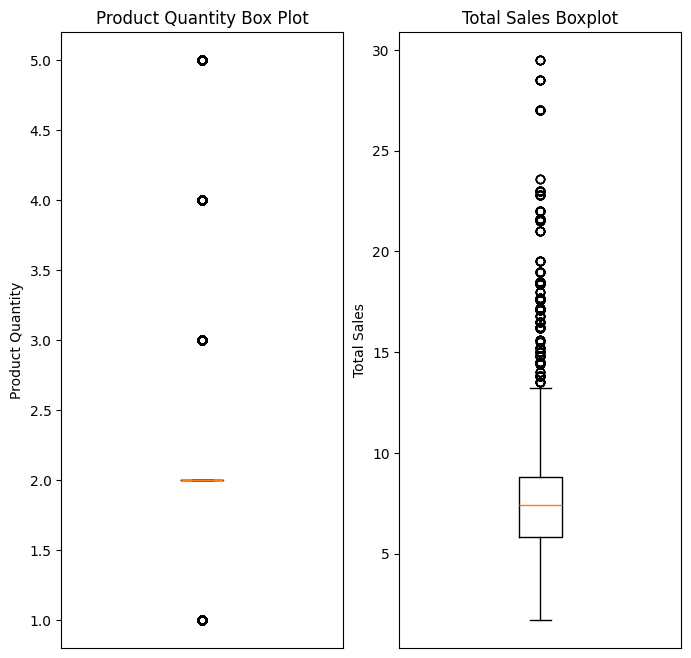

In [106]:
fig, axis = plt.subplots(1, 2)

# Needs to be bigger or the x labels are covered by titles.
fig.set_size_inches(8, 8)

ax1 = axis[0]
ax2 = axis[1]

ax1.boxplot(td_clean['PROD_QTY'])
ax1.set_title("Product Quantity Box Plot")
ax1.set_ylabel("Product Quantity")
ax1.axes.get_xaxis().set_visible(False)

ax2.boxplot(td_clean['TOT_SALES'])
ax2.set_title("Total Sales Boxplot")
ax2.set_ylabel("Total Sales")
ax2.axes.get_xaxis().set_visible(False)

In [107]:
calc_outlier_bounds_normal('PROD_QTY')
calc_outlier_bounds_normal('TOT_SALES')

Lowerbound: 0.8789581682880749, Upperbound: 2.9339542091132382
Lowerbound: -0.10857882522752949, Upperbound: 14.74080464998233


Our outlier bounds seem to indicate outliers still exist, however we can apply a certain amount of common sense, and chalk it down to the fact that certain situations are just more common. It is entirely sensible for 30 packets to be kept of a popular/trending chip packet.

We can safely remove the PROD_NAME column now

In [108]:
td_clean = td_clean.drop('PROD_NAME', axis=1)

In [109]:
td_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,TYPE
0,2018-10-17,1,1000,1,5,2,6.0,175,NCC,Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs,Nacho Cheese
2,2019-05-20,1,1343,383,61,2,2.9,170,Smiths,Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,5,15.0,175,Smiths,Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle,Tortilla ChpsHny&Jlpno Chili


## Analysis

In [110]:
len(td_clean.DATE.unique())

364

In [111]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Create a DataFrame with the full date range
all_dates = pd.DataFrame({'DATE': date_range})

# Merge the full date range with the original data
transactions_complete = all_dates.merge(td_clean, on='DATE', how='left').fillna(0)

# Display the completed DataFrame (with missing dates filled)
print(transactions_complete)

             DATE  STORE_NBR  LYLTY_CARD_NBR    TXN_ID  PROD_NBR  PROD_QTY  \
0      2018-07-01       47.0         47142.0   42540.0      14.0       2.0   
1      2018-07-01       55.0         55073.0   48884.0      99.0       2.0   
2      2018-07-01       55.0         55073.0   48884.0      91.0       2.0   
3      2018-07-01       58.0         58351.0   54374.0     102.0       2.0   
4      2018-07-01       68.0         68193.0   65598.0      44.0       2.0   
...           ...        ...             ...       ...       ...       ...   
246736 2019-06-30      242.0        242159.0  246222.0      36.0       2.0   
246737 2019-06-30      244.0        244213.0  247339.0      93.0       2.0   
246738 2019-06-30      256.0        256018.0  255130.0     105.0       2.0   
246739 2019-06-30      257.0        257079.0  256218.0      71.0       2.0   
246740 2019-06-30      265.0        265006.0  263307.0     106.0       1.0   

        TOT_SALES  PACK_SIZE       BRAND                       

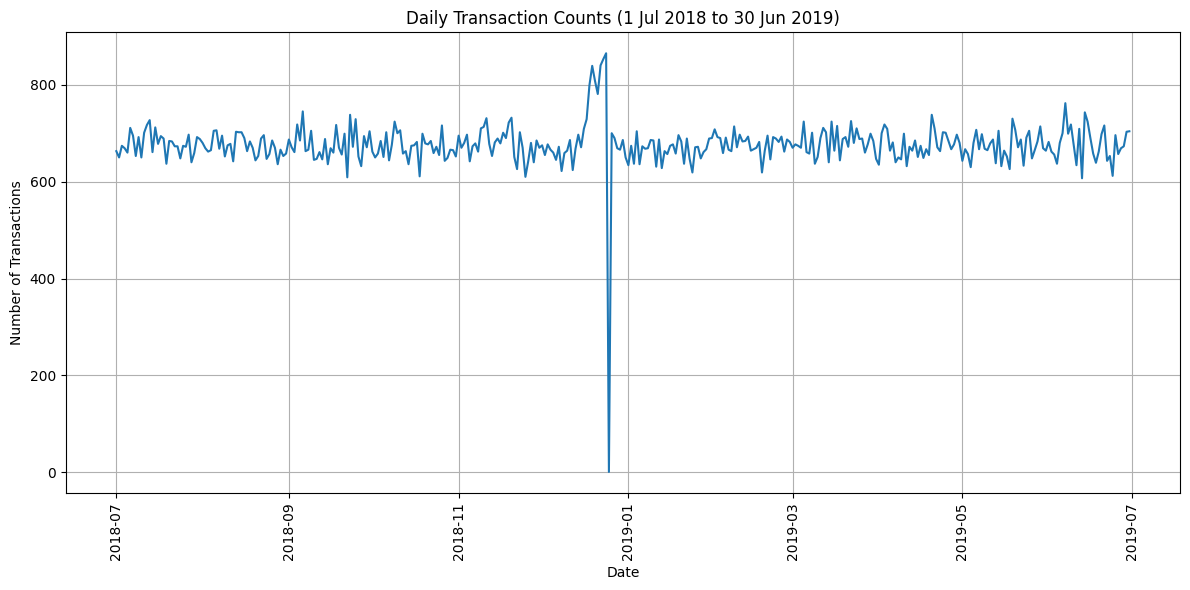

In [112]:
# Count the number of transactions per day
transactions_per_day = transactions_complete.groupby('DATE').size().reset_index(name='Transaction_Count')

plt.figure(figsize=(12, 6))
plt.plot(transactions_per_day['DATE'], transactions_per_day['Transaction_Count'], linestyle='-', marker=None)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Counts (1 Jul 2018 to 30 Jun 2019)')
plt.xticks(rotation=90)  # Rotate x-axis labels to prevent overlap
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

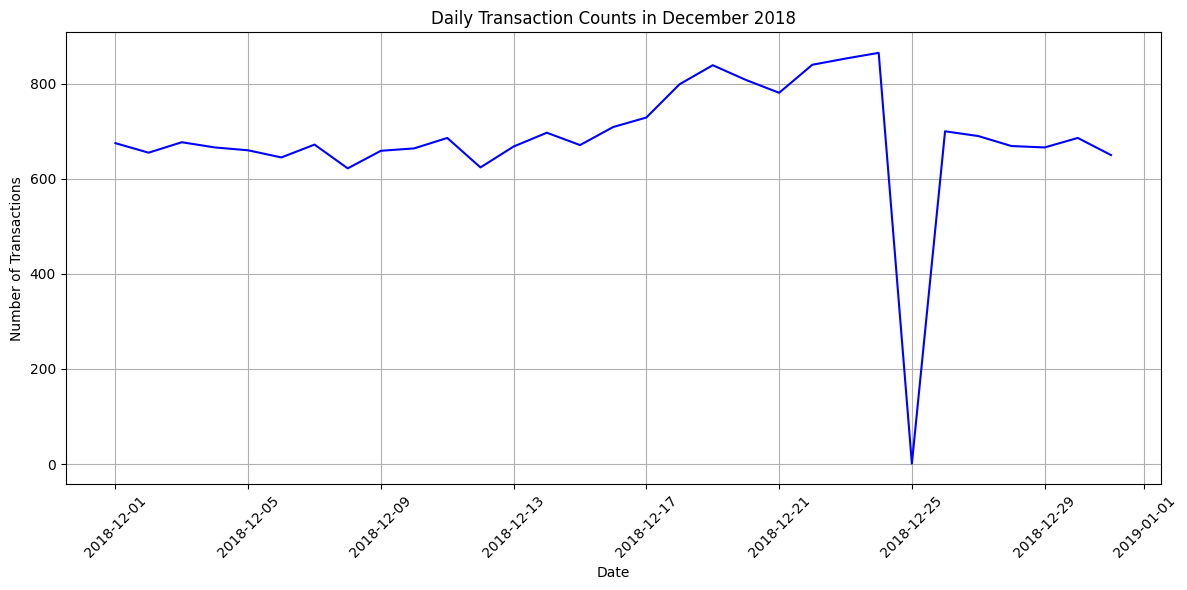

In [113]:
# Filter for December 2018
december_transactions = transactions_per_day[transactions_per_day['DATE'].dt.month == 12]
december_transactions = december_transactions[december_transactions['DATE'].dt.year == 2018]
plt.figure(figsize=(12, 6))
plt.plot(december_transactions['DATE'], december_transactions['Transaction_Count'], linestyle='-', marker=None, color='b')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Counts in December 2018')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

Merge and check for nulls then export to data.csv file. 

In [114]:
data = td_clean.merge(purchase_behaviour, how='left', on='LYLTY_CARD_NBR')  
missing_customers = data[data['LYLTY_CARD_NBR'].isnull()]  
print(f"Number of transactions without matched customer details: {missing_customers.shape[0]}")
for col in data.columns:
    if data[col].hasnans:
        print(col)

Number of transactions without matched customer details: 0


In [115]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,TYPE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175,NCC,Chip Compny SeaSalt,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,2,2.9,170,Smiths,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,5,15.0,175,Smiths,Chip Thinly S/Cream&Onion,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle,Tortilla ChpsHny&Jlpno Chili,MIDAGE SINGLES/COUPLES,Budget


In [116]:
data.to_csv("resources/data.csv", index=False)

## Analysis

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

- How many customers are in each segment

- How many chips are bought per customer by segment

- What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:

- The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips 

- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

Total Sales by Lifestage

In [117]:
data = pd.read_csv("resources/data.csv")

In [118]:
lifestage_sales = data.groupby('LIFESTAGE').agg({
    'TOT_SALES': 'sum'
}).reset_index()

In [119]:
lifestage_sales

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,172523.80
1,NEW FAMILIES,47347.95
2,OLDER FAMILIES,328519.90
3,OLDER SINGLES/COUPLES,376019.65
4,RETIREES,342381.90
5,YOUNG FAMILIES,294627.90
6,YOUNG SINGLES/COUPLES,243756.60


In [127]:
lifestage_ordering = ['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'OLDER SINGLES/COUPLES', 
                      'RETIREES', 'NEW FAMILIES', 'YOUNG FAMILIES', 'OLDER FAMILIES']
lifestage_sales['LIFESTAGE'] = pd.Categorical(lifestage_sales['LIFESTAGE'], categories=lifestage_ordering, ordered=True)
lifestage_sales = lifestage_sales.sort_values(by='LIFESTAGE', ignore_index=True)


In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(lifestage_sales['LIFESTAGE'], lifestage_sales['TOT_SALES'])
plt.title("Total Sales by life stage")
plt.xlabel("Life Stage")
plt.tight_layout()
plt.ylabel("Total Sales")
plt.ylim(0, 400000)

NameError: name 'plt' is not defined